# Sathvik Radhakrishnan

## Research question/interests

I would like to know the relationships between different parameters (nationality, age, position, speed) and their relationship to a players market value.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Exploratory Data Analysis

In [68]:
#Loading the data set

df = pd.read_csv("../data/raw/FIFA22_official_data.csv")

In [69]:
#Getting basic information about dataset
print(df.head(5))
print(df.shape)
print(df.columns)

       ID             Name  Age  \
0  212198  Bruno Fernandes   26   
1  209658      L. Goretzka   26   
2  176580        L. Suárez   34   
3  192985     K. De Bruyne   30   
4  224334         M. Acuña   29   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/212/198/22_60.png    Portugal   
1  https://cdn.sofifa.com/players/209/658/22_60.png     Germany   
2  https://cdn.sofifa.com/players/176/580/22_60.png     Uruguay   
3  https://cdn.sofifa.com/players/192/985/22_60.png     Belgium   
4  https://cdn.sofifa.com/players/224/334/22_60.png   Argentina   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.com/flags/pt.png       88         89   
1  https://cdn.sofifa.com/flags/de.png       87         88   
2  https://cdn.sofifa.com/flags/uy.png       88         88   
3  https://cdn.sofifa.com/flags/be.png       91         91   
4  https://cdn.sofifa.com/flags/ar.png       84         84   

             

In [70]:
#To see the number of unique entries
df.nunique(axis=0)

ID                     16710
Name                   16089
Age                       30
Photo                  16710
Nationality              168
                       ...  
GKReflexes                74
Best Position             15
Best Overall Rating       51
Release Clause          1170
DefensiveAwareness        90
Length: 65, dtype: int64

In [71]:
#To see the number of countries included in the game and the sorted list of countries
print(len(df.Nationality.unique()))

168


In [72]:
#Function to clean up the currenncy columns

def convert_currency_to_number(value):
    '''Converts currency from a string with currency logo and short form for million and kilo to only numbers'''
    value = str(value).strip('€')
    if "M" in value:
        value = re.sub("[^0-9]", "", value)
        value = float(value)*1000000
    elif "K" in value: 
        value = re.sub("[^0-9]", "", value)
        value = float(value)*1000
    return(float(value))

In [73]:
#The value is a string, need to remove euro symbol and convert to double
#Also convert M and K to their numberical values
df['Value'] = df['Value'].map(lambda x: convert_currency_to_number(x))
print(df.Value)

#The value of the players are now in float format and dont have the unnecessary symbols

0       1075000000.00000
1         93000000.00000
2        445000000.00000
3       1255000000.00000
4         37000000.00000
              ...       
16705       100000.00000
16706       180000.00000
16707       100000.00000
16708       110000.00000
16709            0.00000
Name: Value, Length: 16710, dtype: float64


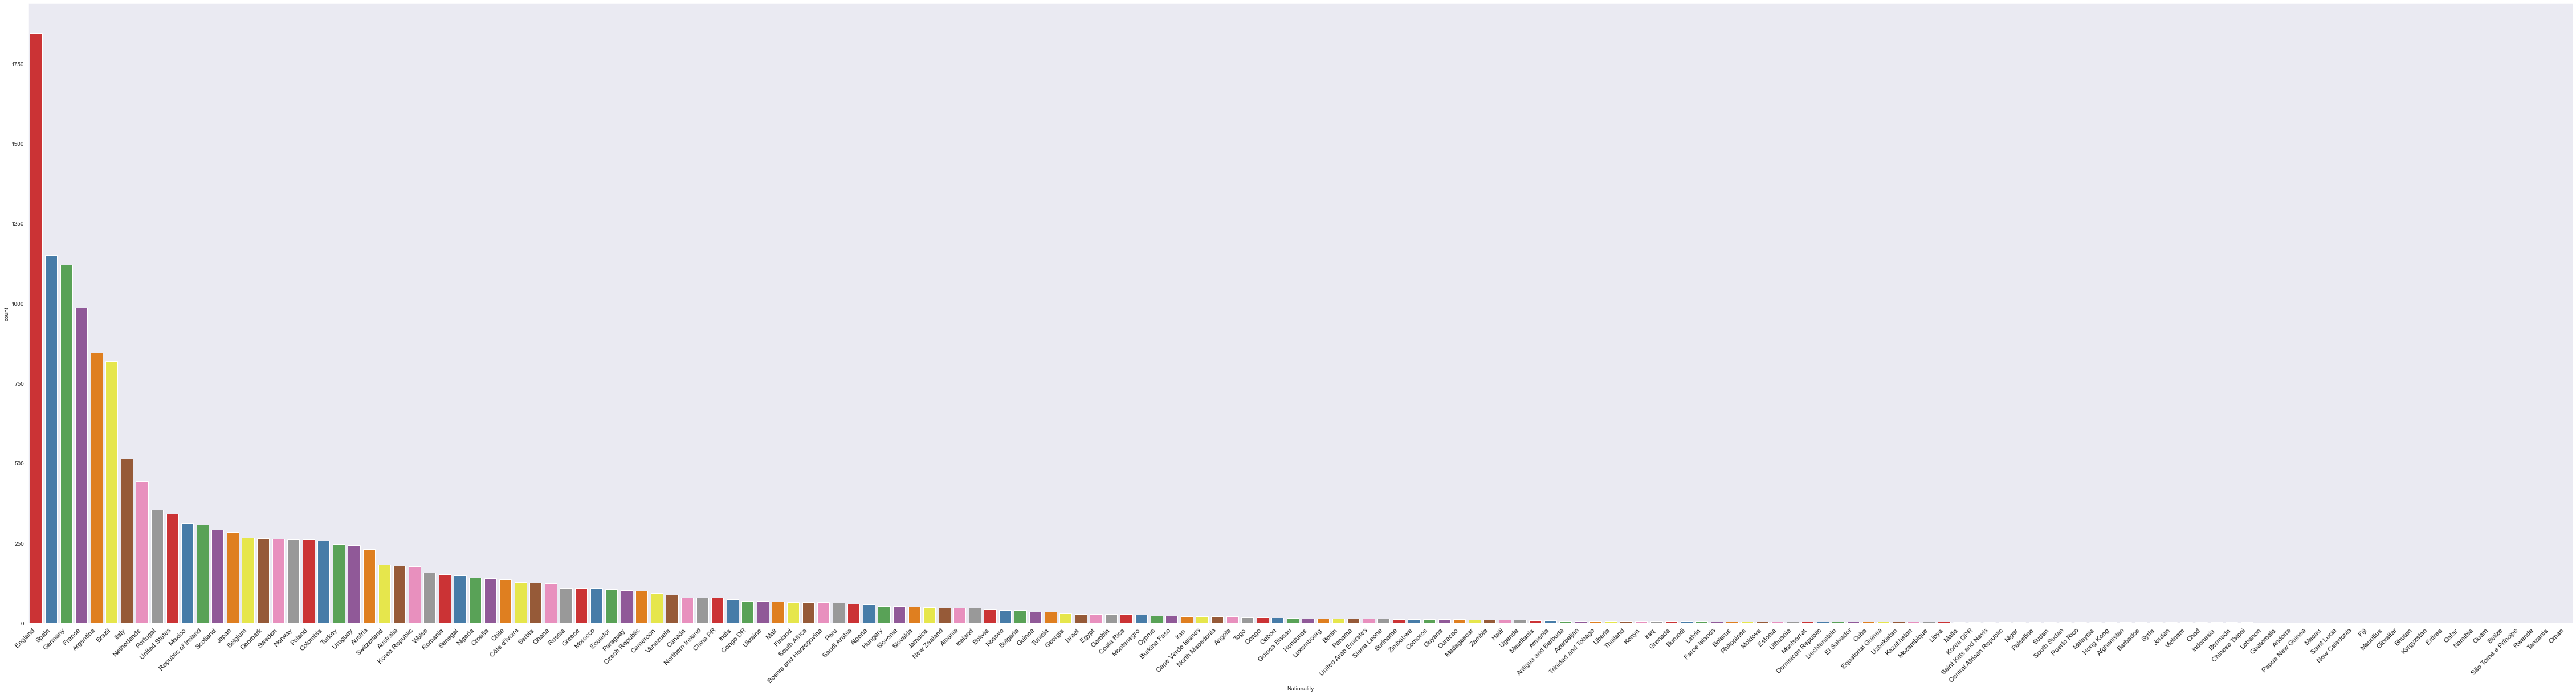

In [74]:
#Plot to see which country has the most number of players

plt.figure(figsize=(80,20));
chart = sns.countplot(
    data=df,
    x='Nationality',
    palette='Set1',
    order = df['Nationality'].value_counts().index
);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

# Looks like England has the highest followed by Spain and Germany

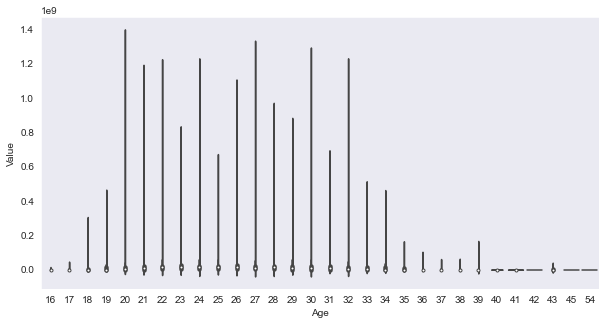

In [75]:
#Distribution of age and value
plt.figure(figsize=(10,5))
chart = sns.violinplot(x='Age',y='Value',data=df)

#I can see that the value of a player is at the hidgest when they are between 20 - 30 years old

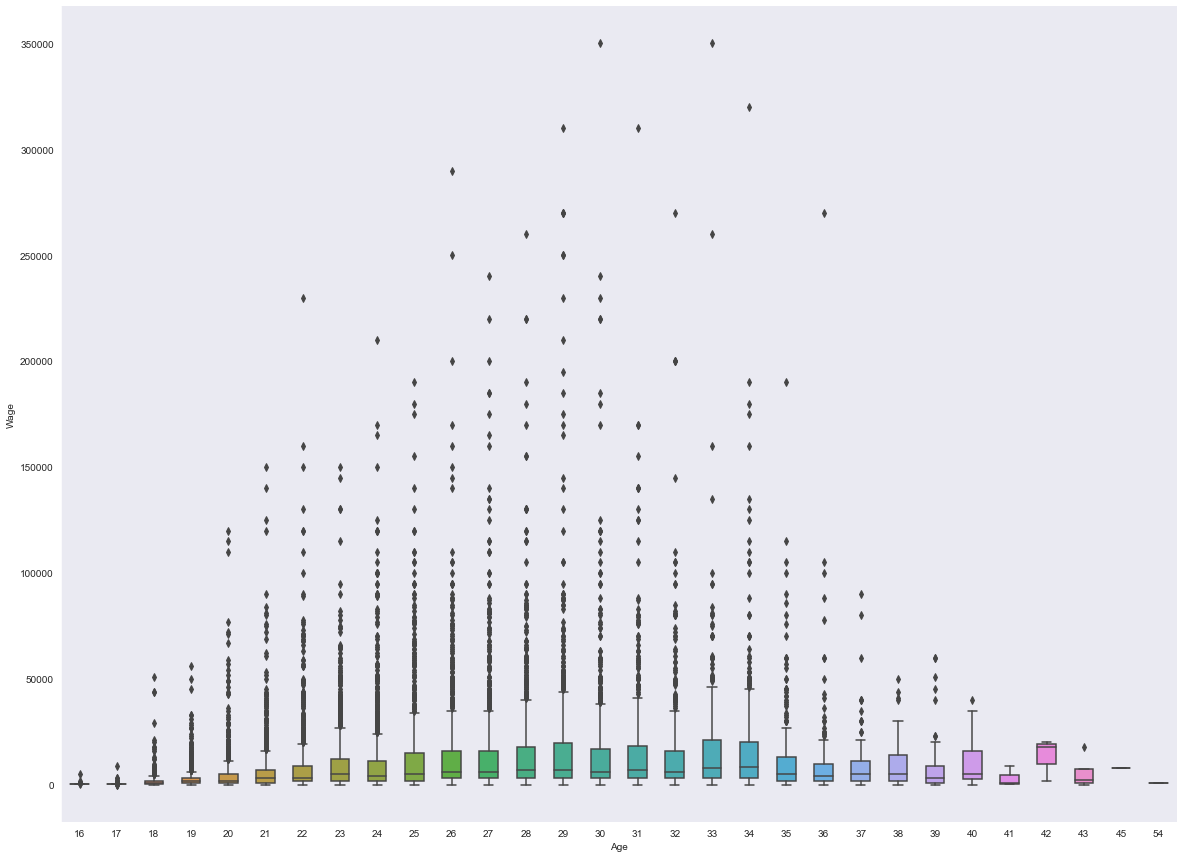

In [76]:
#Age vs Wage 
df['Wage'] = df['Wage'].map(lambda x: convert_currency_to_number(x))

plt.figure(figsize=(20,15));
chart = sns.boxplot(x='Age', y='Wage', data=df,
          width=0.5);
sns.despine()

#We can see that there is a litte correalion between the age and wage. I will explore this later using a heat map

In [77]:
def clean_position(pos):
    """Function to clean the position column of the data set to extract important information"""
    if isinstance(pos, str) == False:
        pos_cleaned = "NA"
    else:
        pos_cleaned = ''.join([a for a in pos if a.isupper()])
    return pos_cleaned

df['Position'] = df['Position'].map(lambda x: clean_position(x))


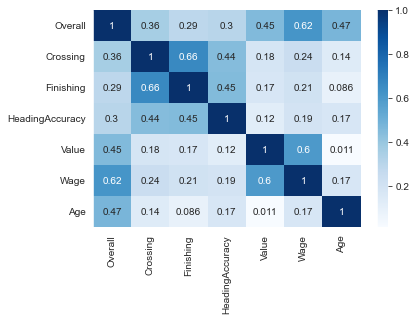

In [78]:
heat = df[['Overall','Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Value', 'Wage', 'Age', ]].corr()
sns.heatmap(heat, annot=True, cmap='Blues')
sns.despine()

#We can see that wage and value have minimal with age

## Data Analysis
I would like to analyse the relationship between player value to different parameters.

First, let us get the cleaned data

In [79]:
#Importing the function python file
import project_functions1 as pf1

#Loading the data and printing the first few line
data = pf1.get_cleaned_data("../data/raw/FIFA22_official_data.csv")
data.head()

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,OnLoan
16709,178453,A. Censori,17,Italy,28,Arezzo,0.00000,0.00000,Right,1.00000,...,NaN,16.00000,NaN,7.00000,1.00000,36.00000,6.00000,9.00000,0.00000,No
15787,161659,Danilo,24,Brazil,64,Gallos Blancos de Querétaro,0.00000,0.00000,Left,2.00000,...,NaN,28.00000,NaN,11.00000,6.00000,57.00000,15.00000,12.00000,0.00000,No
15794,164945,Nuno Mendes,28,Portugal,71,US Créteil-Lusitanos,0.00000,0.00000,Right,2.00000,...,NaN,64.00000,NaN,11.00000,12.00000,26.00000,13.00000,13.00000,0.00000,No
13387,5736,P. Cocu,35,Netherlands,87,PSV,0.00000,0.00000,Left,4.00000,...,NaN,76.00000,NaN,10.00000,7.00000,87.00000,5.00000,10.00000,0.00000,No
15351,4174,P. Sarr,28,Senegal,65,Stade Brestois 29,0.00000,0.00000,Right,1.00000,...,NaN,63.00000,NaN,9.00000,12.00000,68.00000,8.00000,11.00000,0.00000,No


I think the players' value is very much dependent on their age. I also want to see how much correlation it has to their current wage. I will use the heat map from my EDA start this analysis.

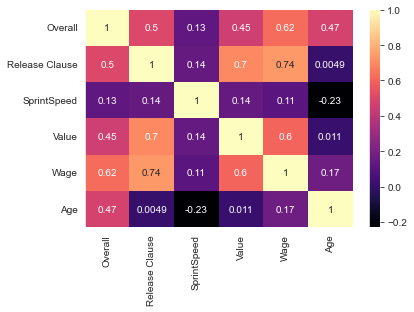

In [80]:
heat = data[['Overall', 'Release Clause', 'SprintSpeed', 'Value', 'Wage', 'Age' ]].corr()
sns.heatmap(heat, annot=True, cmap='magma')
sns.despine()

I notice that the age of a player barely has any correlation with the players value.
I also notice that the value and age have some correlation. We can also see that the overall rating of a player has a greater effect on their wage than value. I also see strong connections of the release clause with value and wage.

I would like to plot the relationship between wage and value.

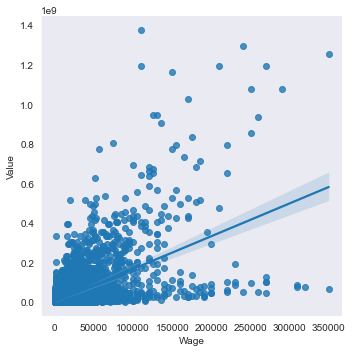

In [81]:
sns.set_style("dark")
sns.lmplot(x='Wage', y='Value', data=data)
sns.despine()

Let me also see the relationship between release clause and wage

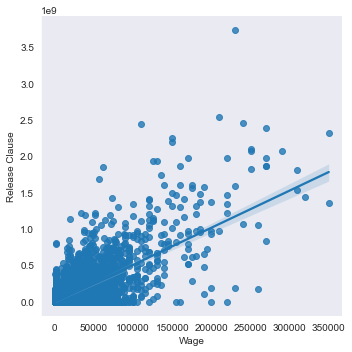

In [82]:
sns.lmplot(x='Wage', y='Release Clause', data=data)
sns.despine()

I do not get much infomation from these graphs other than that there seems to be somewhat of a linear trend.

At this point, I also want to look at how players values are based on their country.

In [83]:
#Making 2 new data fromes to to see the relationship between a country and its total wage as well as its total value

list_of_countries = list(df.Nationality.unique())

total_value_by_country = dict.fromkeys(list_of_countries,0)
total_wage_by_country = dict.fromkeys(list_of_countries,0)
 
for ind in data.index:
    total_value_by_country[df['Nationality'][ind]]+=df['Value'][ind]
    total_wage_by_country[df['Nationality'][ind]]+=df['Wage'][ind]

total_value_by_country_df = pd.DataFrame(list(total_value_by_country.items()), columns = ['Country', 'Total Value'])
total_wage_by_country_df = pd.DataFrame(list(total_wage_by_country.items()), columns = ['Country', 'Total Wage'])

We have got our required data frame. Now let us plot them using a bar plot.
First the total value. The images need to be opened seperately due to not being able to display them in full size in Jupyter.

Text(0, 0.5, 'Total Value')

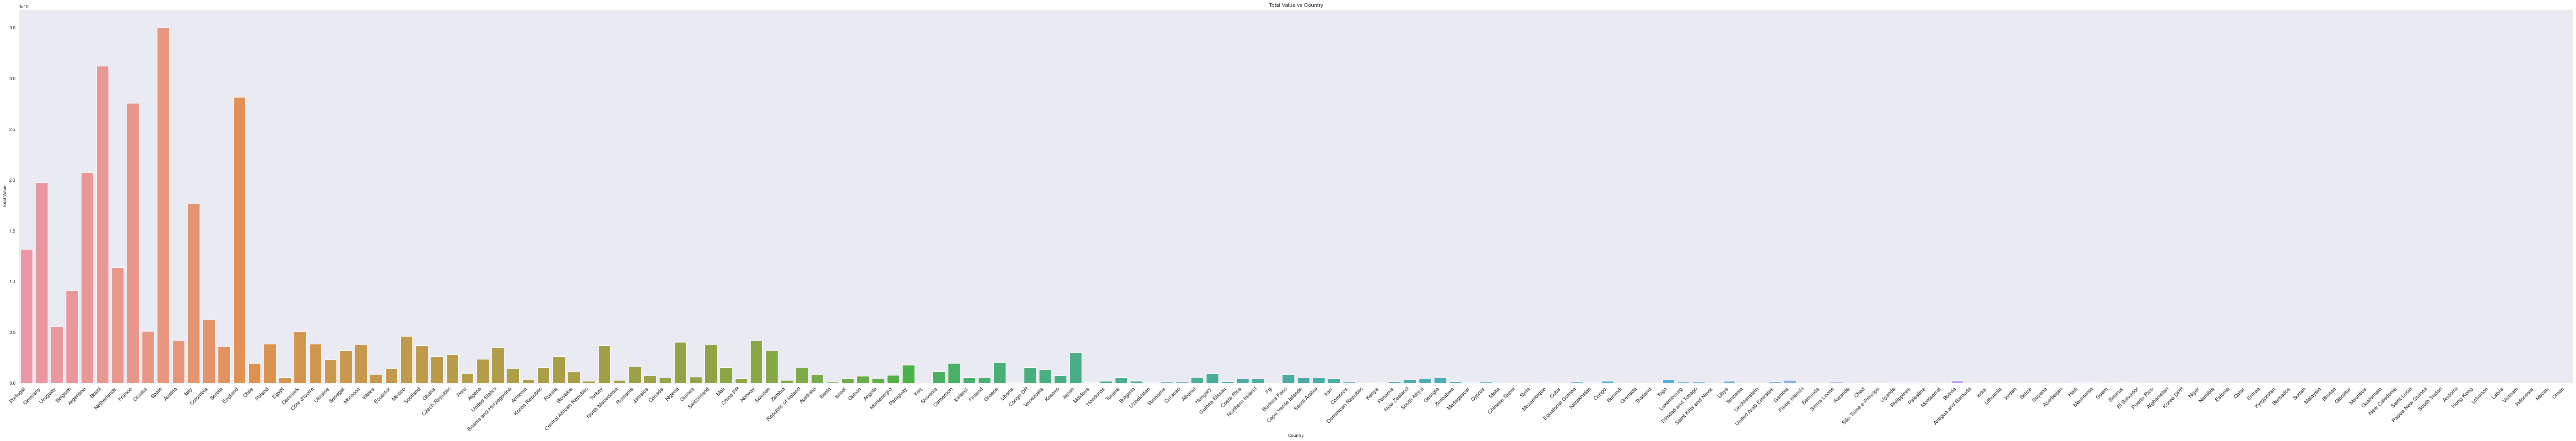

In [84]:
plt.figure(figsize=(100,15));
chart = sns.barplot(data=total_value_by_country_df, x="Country", y="Total Value")  
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

plt.title("Total Value vs Country")
plt.xlabel("Country")
plt.ylabel("Total Value")
  

Now let us compare the total wages.

Text(0, 0.5, 'Total Wage')

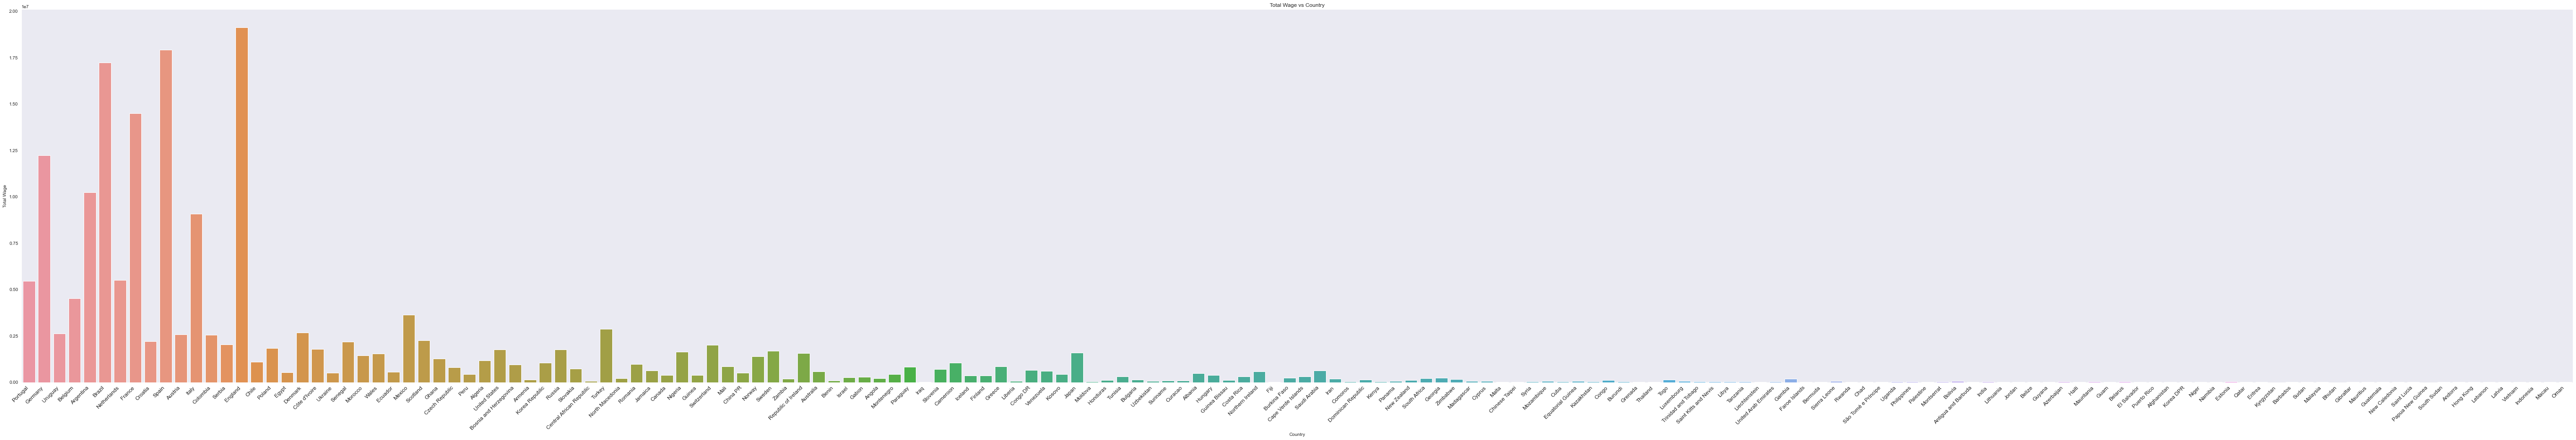

In [85]:
plt.figure(figsize=(100,15));
chart = sns.barplot(data=total_wage_by_country_df, x="Country", y="Total Wage")  
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

plt.title("Total Wage vs Country")
plt.xlabel("Country")
plt.ylabel("Total Wage")

We can make some findings from these graphs. Although England has by far the most number of players in the game, the most valuable countries are Spain and Brazil. We also noticed a correlation to the players overall and value and we can make an assumption that the overall quality of players from Spain and Brazil are higher than that of England. This can also be seen in case of the wage as the total wages are almost the same. 

I would also like to see if physical attributes have an effect on value. For this we will use a heat map again as it gives us the most detail.


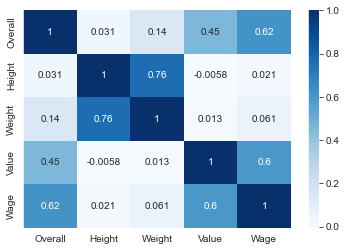

In [86]:
heat = data[['Overall', 'Height', 'Weight', 'Value', 'Wage', ]].corr()
sns.heatmap(heat, annot=True, cmap='Blues')
sns.despine()

We see that physical attributes such as height and weight have no correlation with a players value and the values in the heat
map are very close to 0 indicating that there is no correlation.

Now let us see the relationship between a players position and their average value. We will drop SUB, RES and NA as they are irrelevent positions.

In [87]:
list_of_positions = sorted(list(df.Position.unique()))

total_value_by_position = dict.fromkeys(list_of_positions, 0)
total_wage_by_position = dict.fromkeys(list_of_positions, 0)

for ind in data.index:
    total_value_by_position[data['Position'][ind]]=df['Value'][ind]
    total_wage_by_position[data['Position'][ind]]+=df['Wage'][ind]
   
total_value_by_position_df = pd.DataFrame(list(total_value_by_position.items()), columns = ['Position', 'Total Value'])
total_value_by_position_df['Count'] = total_value_by_position_df['Position'].map(lambda x: data['Position'].value_counts()[str(x)])
total_value_by_position_df['Normalised Value'] = total_value_by_position_df['Total Value']/total_value_by_position_df['Count']

total_wage_by_position_df = pd.DataFrame(list(total_wage_by_position.items()), columns = ['Position', 'Total Wage'])
total_wage_by_position_df['Count'] = total_value_by_position_df['Position'].map(lambda x: data['Position'].value_counts()[str(x)])
total_wage_by_position_df['Normalised Wage'] = total_wage_by_position_df['Total Wage']/total_wage_by_position_df['Count']


position_financials = pd.merge(total_value_by_position_df,total_wage_by_position_df, how = "outer")

position_financials = position_financials[["Position", "Count", "Total Value", "Normalised Value", "Total Wage", "Normalised Wage"]]

position_financials = position_financials[(position_financials.Position != "SUB") & (position_financials.Position != "RES") & (position_financials.Position != "NA")]



position_financials

,Position,Count,Total Value,Normalised Value,Total Wage,Normalised Wage
0,CAM,283,38000000.00000,134275.61837,4649250.00000,16428.44523
1,CB,150,250000.00000,1666.66667,2013200.00000,13421.33333
2,CDM,160,1000000.00000,6250.00000,2853250.00000,17832.81250
3,CF,11,625000.00000,56818.18182,612000.00000,55636.36364
4,CM,75,16000000.00000,213333.33333,934700.00000,12462.66667
5,GK,572,12000000.00000,20979.02098,7463250.00000,13047.63986
6,LAM,22,19000000.00000,863636.36364,302000.00000,13727.27273
7,LB,423,125000000.00000,295508.27423,5603300.00000,13246.57210
8,LCB,609,850000.00000,1395.73071,7673150.00000,12599.58949
9,LCM,395,55000000.00000,139240.50633,5664100.00000,14339.49367


We have the financial data now for each of the positions. Let us now see whci positions are most valuable and the most highest paid.

First, lets see the number of players in each position.

Text(0, 0.5, 'Number of Players')

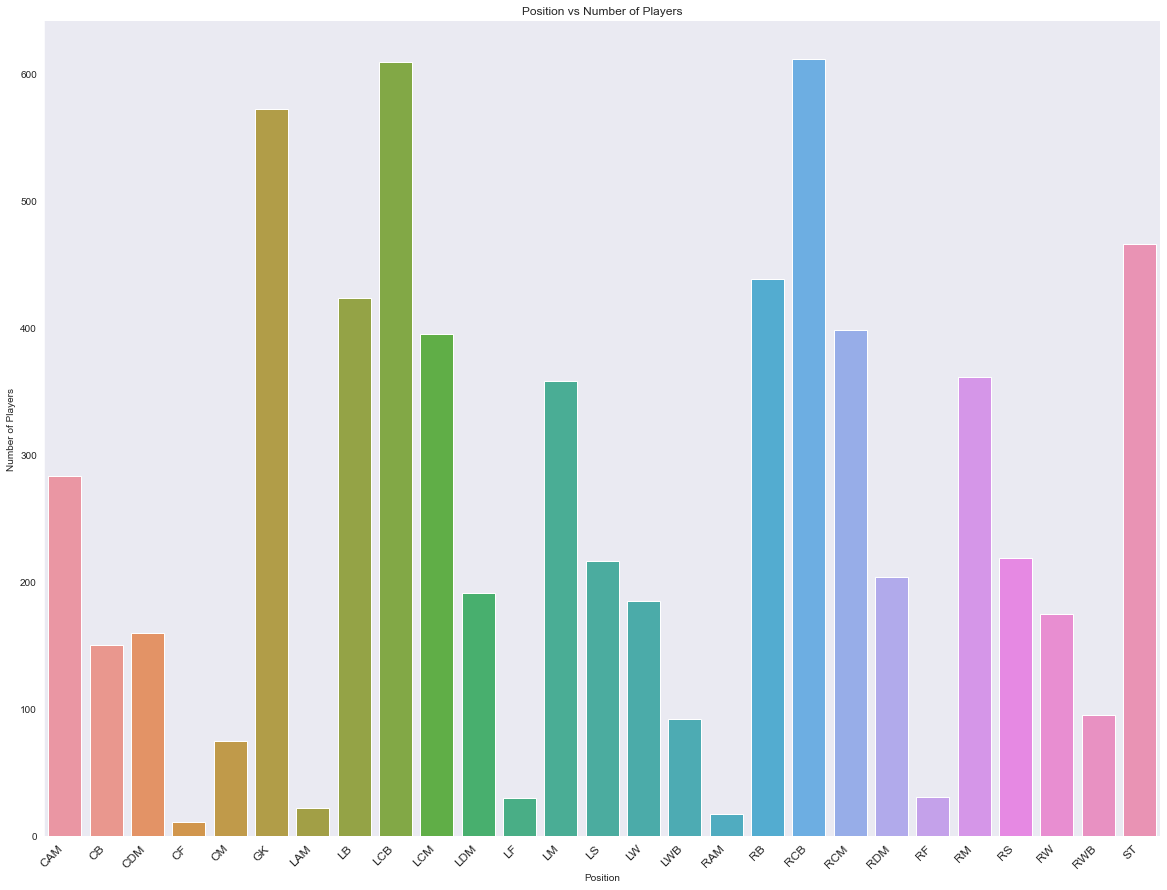

In [88]:
plt.figure(figsize=(20,15));
chart = sns.barplot(data=position_financials, x="Position", y=("Count") ) 
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

plt.title("Position vs Number of Players")
plt.xlabel("Position")
plt.ylabel("Number of Players")

Now, position vs normailsed wage

Text(0, 0.5, 'Normalised Wage')

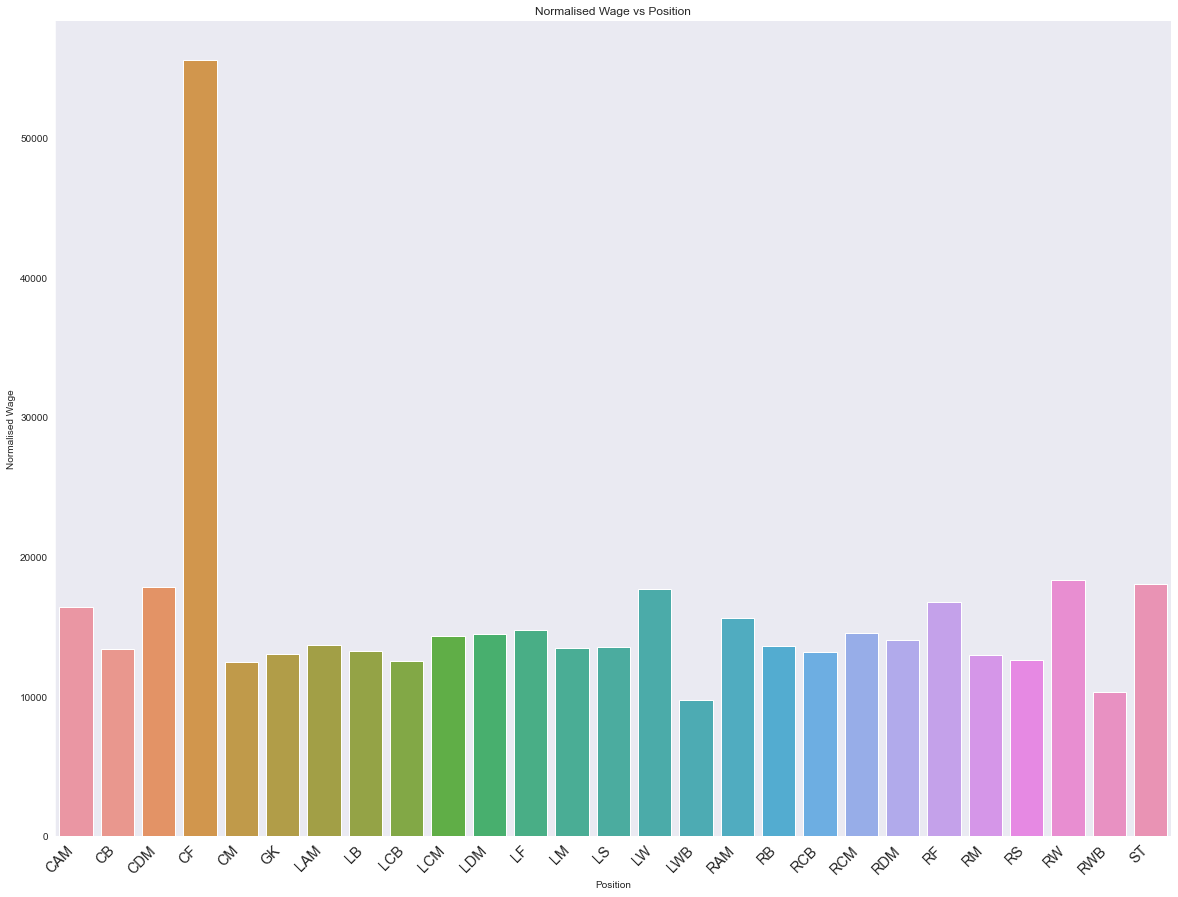

In [89]:
plt.figure(figsize=(20,15));
chart = sns.barplot(data=position_financials, x="Position", y=("Normalised Wage") ) 
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

plt.title("Normalised Wage vs Position")
plt.xlabel("Position")
plt.ylabel("Normalised Wage")

Now, the comparison between Normalised Value and Position

Text(0, 0.5, 'Normalised Value')

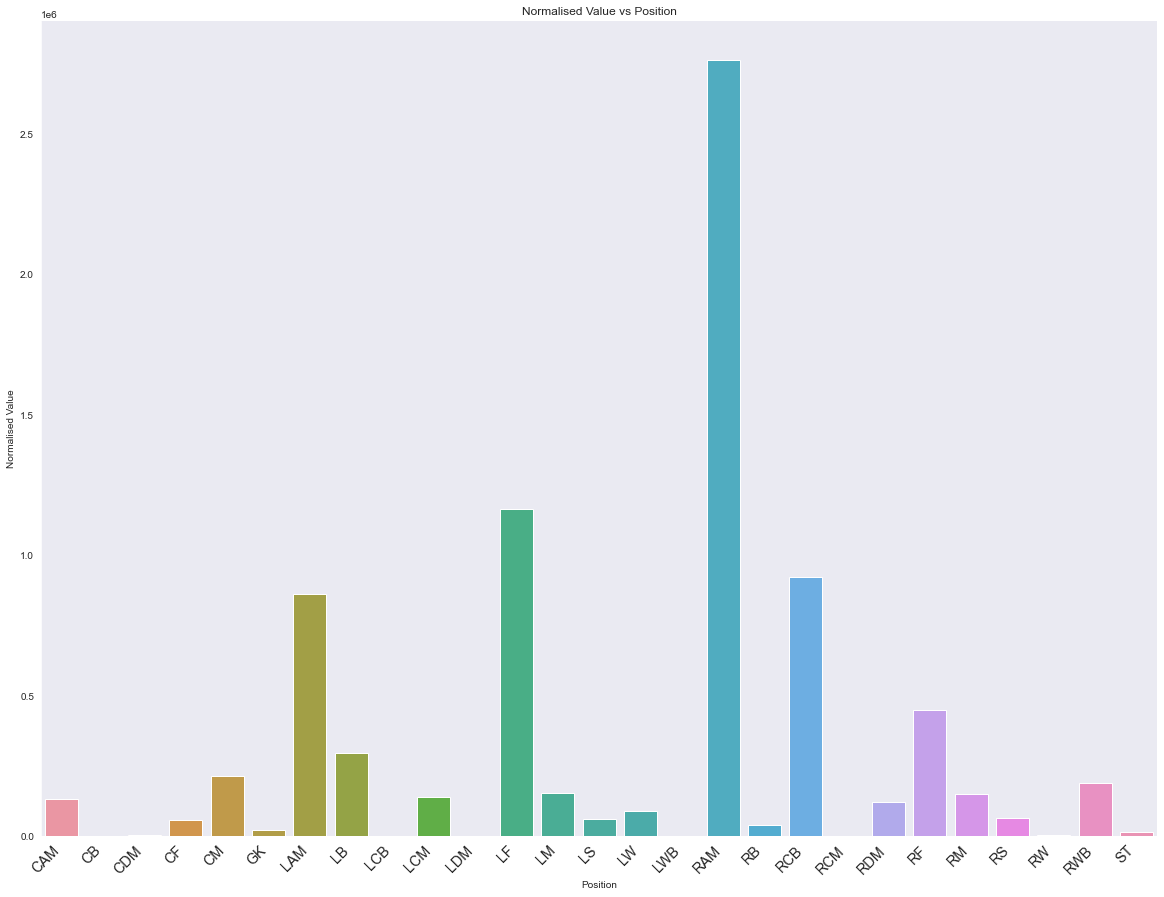

In [90]:
plt.figure(figsize=(20,15));
chart = sns.barplot(data=position_financials, x="Position", y=("Normalised Value") ) 
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

plt.title("Normalised Value vs Position")
plt.xlabel("Position")
plt.ylabel("Normalised Value")

We can see that although the wages for CF position players are the highest, RAM position players are more valuble compareatively. This can be due to the number of players available and most of the star players playing in the CF position.

### Conclusion

In this milestone, we explored the relationships between the financial aspects (wage and value) of players to different attribute and made some findings. We were able to compare the different countries and positions. We also check if there was any correlation between physical attributes and player financials but concluded that there was no correlation.
